In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
Data = pd.read_csv('sample_all.csv')

In [3]:
Data

,Unnamed: 0,SeasonId,RoundId,PositionId,Captain,ElapsedMillisecs,Tackle,Points,PossessionSecs,TotalPossessionSecs,...,Weather_2,Weather_3,Weather_4,Weather_1040,Half_1,Half_2,Half_3,Half_4,Missed_convert,TRY_Convert
0,0,2019,1,1.0,1,1771200,0,2.0,537.82,1142.02,...,0,0,1,0,1,0,0,0,0,0
1,1,2019,1,2.0,0,290720,0,2.0,991.28,1855.64,...,0,0,1,0,0,1,0,0,0,0
2,2,2019,1,0.0,0,486880,6,4.0,1068.54,1982.58,...,0,0,1,0,0,1,0,0,0,1
3,3,2019,1,2.0,0,582440,0,2.0,1068.62,1982.66,...,0,0,1,0,0,1,0,0,0,0
4,4,2019,1,0.0,0,1379560,3,4.0,1313.64,2368.24,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,3979,2021,25,2.0,0,2030960,0,4.0,1444.38,3115.62,...,1,0,0,0,0,1,0,0,0,1
3980,3980,2021,25,1.0,0,2088680,0,2.0,1444.46,3115.70,...,1,0,0,0,0,1,0,0,0,0
3981,3981,2021,25,2.0,0,2431400,3,4.0,1600.90,3389.56,...,1,0,0,0,0,1,0,0,1,0
3982,3982,2021,25,2.0,0,2791920,5,4.0,1709.26,3557.92,...,1,0,0,0,0,1,0,0,0,1


In [8]:
Data = Data[['SeasonId', 'RoundId', 'Goal_TRY', 'Goal_CVOK', 'Goal_PGOK', 'Goal_FGOK']]
Data

,SeasonId,RoundId,Goal_TRY,Goal_CVOK,Goal_PGOK,Goal_FGOK
0,2019,1,0,0,1,0
1,2019,1,0,0,1,0
2,2019,1,1,0,0,0
3,2019,1,0,1,0,0
4,2019,1,1,0,0,0
...,...,...,...,...,...,...
3979,2021,25,1,0,0,0
3980,2021,25,0,1,0,0
3981,2021,25,1,0,0,0
3982,2021,25,1,0,0,0


In [9]:
length = len(Data)
for i in range(length):
    if Data['SeasonId'][i] == 2020:
        Data['RoundId'][i] += 29
    elif Data['SeasonId'][i] == 2021:
        Data['RoundId'][i] += 54
Data['RoundId']

0        1
1        1
2        1
3        1
4        1
        ..
3979    79
3980    79
3981    79
3982    79
3983    79
Name: RoundId, Length: 3984, dtype: int64

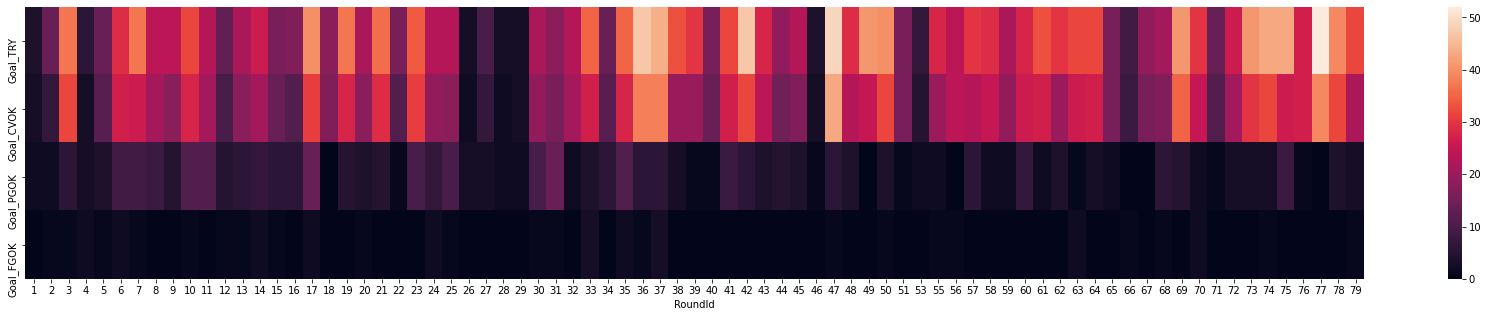

In [47]:
D = Data.groupby('RoundId').sum()

D = D.T

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,5))         # Sample figsize in inches
sns.heatmap(D, ax=ax)
plt.savefig('Heat.png', dpi = 100)

In [51]:
D = D.T
D

,Goal_TRY,Goal_CVOK,Goal_PGOK,Goal_FGOK
RoundId,,,,
1,4,3,2,0
2,14,7,2,1
3,37,32,6,1
4,6,3,3,2
5,14,12,4,1
...,...,...,...,...
75,43,26,8,0
76,27,27,1,0
77,52,39,0,0


In [54]:
D['Totals'] = D['Goal_TRY'] + D['Goal_CVOK'] + D['Goal_PGOK'] + D['Goal_FGOK']
D

,Goal_TRY,Goal_CVOK,Goal_PGOK,Goal_FGOK,Totals
RoundId,,,,,
1,4,3,2,0,9
2,14,7,2,1,24
3,37,32,6,1,76
4,6,3,3,2,14
5,14,12,4,1,31
...,...,...,...,...,...
75,43,26,8,0,77
76,27,27,1,0,55
77,52,39,0,0,91


In [55]:
D['Goal_TRY'] = D['Goal_TRY']/D['Totals']
D['Goal_CVOK'] = D['Goal_CVOK']/D['Totals']
D['Goal_PGOK'] = D['Goal_PGOK']/D['Totals']
D['Goal_FGOK'] = D['Goal_FGOK']/D['Totals']
D

,Goal_TRY,Goal_CVOK,Goal_PGOK,Goal_FGOK,Totals
RoundId,,,,,
1,0.444444,0.333333,0.222222,0.000000,9
2,0.583333,0.291667,0.083333,0.041667,24
3,0.486842,0.421053,0.078947,0.013158,76
4,0.428571,0.214286,0.214286,0.142857,14
5,0.451613,0.387097,0.129032,0.032258,31
...,...,...,...,...,...
75,0.558442,0.337662,0.103896,0.000000,77
76,0.490909,0.490909,0.018182,0.000000,55
77,0.571429,0.428571,0.000000,0.000000,91


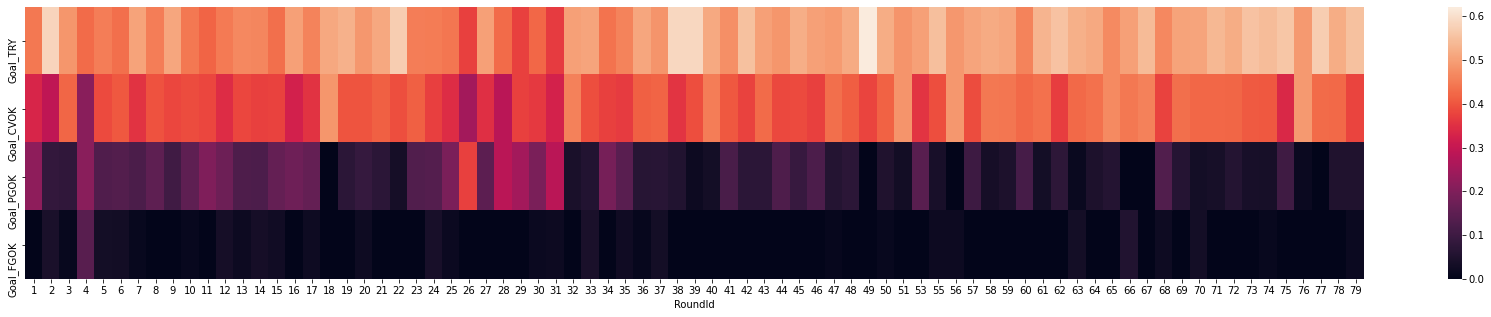

In [60]:
D = D.drop('Totals', axis = 0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,5))         # Sample figsize in inches
sns.heatmap(D, ax=ax)
plt.savefig('Heat.png', dpi = 100)